In [2]:
# Import all the required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Machine Learning
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# See visualization inline (if using Anaconda)
%matplotlib inline

In [4]:
# Read titanic.csv file
titanic_train = pd.read_csv('titanic_train.csv')

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
sns.set_style('whitegrid')

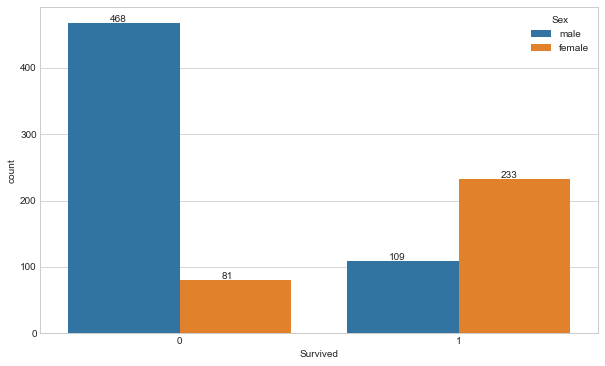

In [7]:
# Data Visualization
plt.figure(figsize=(10,6))
img1 = sns.countplot(x='Survived', hue="Sex", data = titanic_train)
for p in img1.patches:
    img1.annotate(p.get_height(),(p.get_x()+0.15, p.get_height()+1))

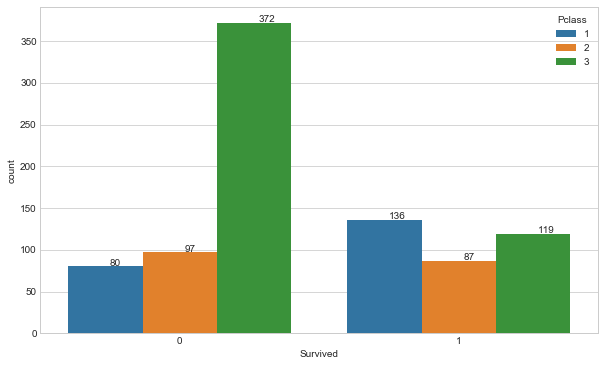

In [8]:
plt.figure(figsize=(10,6))
img2 = sns.countplot(x='Survived', hue="Pclass", data = titanic_train)
for p in img2.patches:
    img2.annotate(p.get_height(),(p.get_x()+0.15, p.get_height()+1))

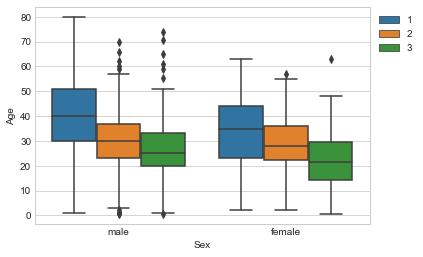

In [9]:
sns.boxplot(x='Sex', y='Age', data=titanic_train, hue='Pclass')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

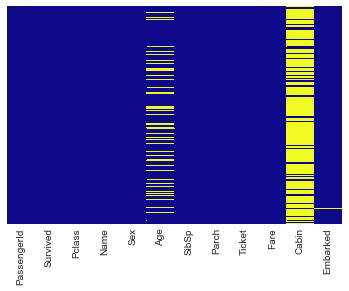

In [10]:
# Missing data
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [11]:
#Data Cleaning
#Age

def name_prefix(str):
    str_prefix = re.findall(r'(M(?:is)?s\.|(?:Mrs\.)|(?:Mr\.)|(?:Master\.)|(?:Rev\.)|(?:Dr\.))',str)
    if (str_prefix != []):
        return str_prefix[0]
    else:
        return 'None'

In [12]:
titanic_train['Name_Prefix'] = titanic_train['Name'].apply(name_prefix)

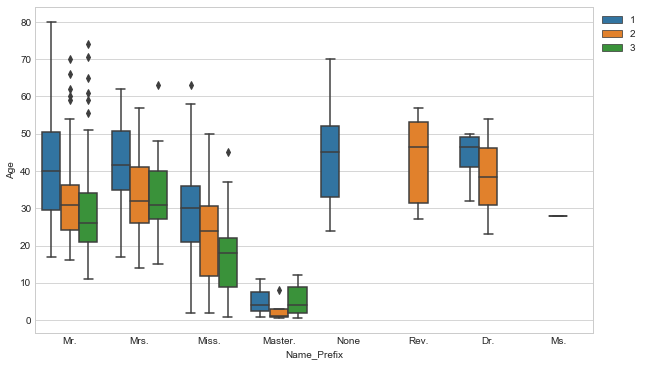

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Name_Prefix', y='Age', data=titanic_train, hue='Pclass')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [14]:
def cal_age(val):
    Age = val[0]
    Pclass = val[1]
    Name_Prefix = val[2]
    
    if pd.isnull(Age):
        if Pclass == 1:
            if Name_Prefix == 'Mr.':
                return 40
            elif Name_Prefix == 'Mrs.':
                return 41
            elif Name_Prefix == 'Miss.':
                return 30
            elif Name_Prefix == 'Master.':
                return 4
            elif Name_Prefix == 'Dr.':
                return 46
            elif Name_Prefix == 'Ms.':
                return 28
            else:
                return 46
            
        elif Pclass == 2:
            if Name_Prefix == 'Mr.':
                return 30
            elif Name_Prefix == 'Mrs.':
                return 32
            elif Name_Prefix == 'Miss.':
                return 24
            elif Name_Prefix == 'Master.':
                return 2
            elif Name_Prefix == 'Dr.':
                return 38
            elif Name_Prefix == 'Ms.':
                return 28
            else:
                return 46
        else:
            if Name_Prefix == 'Mr.':
                return 25
            elif Name_Prefix == 'Mrs.':
                return 13
            elif Name_Prefix == 'Miss.':
                return 18
            elif Name_Prefix == 'Master.':
                return 4
            elif Name_Prefix == 'Dr.':
                return 42
            elif Name_Prefix == 'Ms.':
                return 28
            else:
                return 46

    else:
        return Age

In [15]:
titanic_train['Age'] = titanic_train[['Age','Pclass','Name_Prefix']].apply(cal_age,axis=1)

In [16]:
# Cabin Column
titanic_train.drop(columns = 'Cabin',inplace= True)

In [17]:
# Drop rows that has null values
titanic_train.dropna(axis=0, inplace=True)

In [18]:
# Converting Categorical Feature into dummy variables
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)
name_prefix = pd.get_dummies(titanic_train['Name_Prefix'], drop_first=True)

In [19]:
titanic_train.drop(['Sex','Embarked','Name','Ticket','Name_Prefix'],axis=1,inplace=True)

In [20]:
titanic_train = pd.concat([titanic_train,sex,embark,name_prefix], axis=1)

In [21]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
Master.        889 non-null uint8
Miss.          889 non-null uint8
Mr.            889 non-null uint8
Mrs.           889 non-null uint8
Ms.            889 non-null uint8
None           889 non-null uint8
Rev.           889 non-null uint8
dtypes: float64(2), int64(5), uint8(10)
memory usage: 64.2 KB


In [22]:
# Train Test Split

In [23]:
X = titanic_train.drop('Survived', axis=1)

In [24]:
y = titanic_train['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
# Machine Learning algorithms

# Logistic Regression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predict = logmodel.predict(X_test)
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89       163
          1       0.88      0.73      0.80       104

avg / total       0.86      0.86      0.85       267



In [36]:
# Random Forest


rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)

pred = rfc.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89       163
          1       0.89      0.74      0.81       104

avg / total       0.86      0.86      0.86       267

